In [1]:
# Initial setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [16]:
# Load data
df = pd.read_csv(r"C:\Users\rymot\Desktop\Data Cleaning\data\dirty_cafe_sales.csv")
print(f"Dataset shape: {df.shape}")
df.head(3)

Dataset shape: (10000, 8)


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19


In [29]:
#Create a clean copy
df_clean = df.copy()

In [30]:
# Convert relevant columns to numeric, coercing errors to NaN
df_clean['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df_clean['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df_clean['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

In [31]:
nan_count_Quantity = df["Quantity"].isna().sum()
print(f"Number of NaN values in 'Quantity': {nan_count_Quantity}")
nan_count_Price_Per_Unit = df["Price Per Unit"].isna().sum()
print(f"Number of NaN values in 'Price Per Unit': {nan_count_Price_Per_Unit}")
nan_count_Total_Spent = df["Total Spent"].isna().sum()
print(f"Number of NaN values in 'Total Spent': {nan_count_Total_Spent}")


Number of NaN values in 'Quantity': 138
Number of NaN values in 'Price Per Unit': 179
Number of NaN values in 'Total Spent': 173


In [32]:
# Fill missing Na in numerical values

df_clean.loc[df_clean["Total Spent"].isna() & ~df_clean["Price Per Unit"].isna() & ~df_clean["Quantity"].isna(), 
             "Total Spent"] = df_clean["Price Per Unit"] * df_clean["Quantity"]

df_clean.loc[df_clean["Price Per Unit"].isna() & ~df_clean["Total Spent"].isna() & ~df_clean["Quantity"].isna(), 
             "Price Per Unit"] = df_clean["Total Spent"] / df_clean["Quantity"]

df_clean.loc[df_clean["Quantity"].isna() & ~df_clean["Total Spent"].isna() & ~df_clean["Price Per Unit"].isna(), 
             "Quantity"] = df_clean["Total Spent"] / df_clean["Price Per Unit"]


In [33]:
nan_count_Quantity_clean = df_clean["Quantity"].isna().sum()
print(f"Number of NaN values in 'Quantity': {nan_count_Quantity_clean}")

nan_count_Price_Per_Unit_clean = df_clean["Price Per Unit"].isna().sum()
print(f"Number of NaN values in 'Price Per Unit': {nan_count_Price_Per_Unit_clean}")

nan_count_Total_Spent_clean = df_clean["Total Spent"].isna().sum()
print(f"Number of NaN values in 'Total Spent': {nan_count_Total_Spent_clean}")


Number of NaN values in 'Quantity': 38
Number of NaN values in 'Price Per Unit': 38
Number of NaN values in 'Total Spent': 40


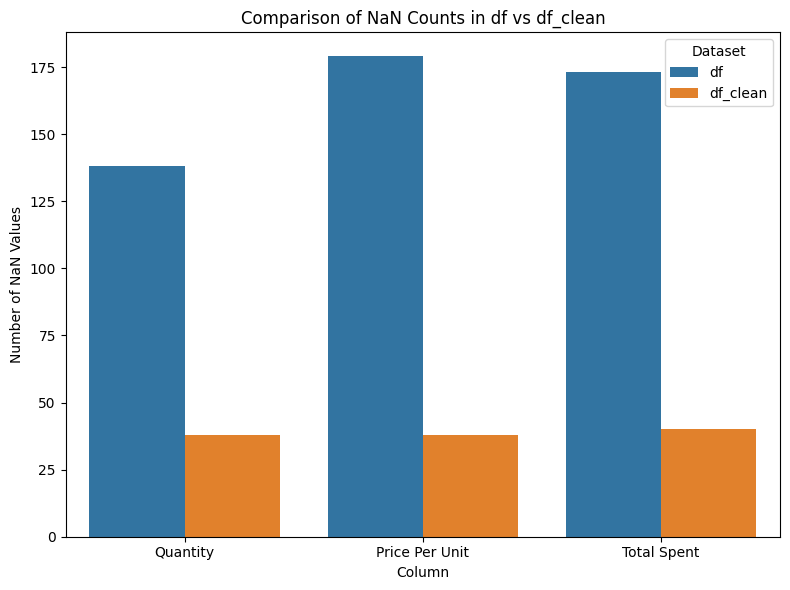

In [22]:
data = {
    'Column': ['Quantity', 'Price Per Unit', 'Total Spent'] * 2,
    'NaN Count': [
        nan_count_Quantity,
        nan_count_Price_Per_Unit,
        nan_count_Total_Spent,
        nan_count_Quantity_clean,
        nan_count_Price_Per_Unit_clean,
        nan_count_Total_Spent_clean
    ],
    'Dataset': ['df'] * 3 + ['df_clean'] * 3
}

df_nan_compare = pd.DataFrame(data)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df_nan_compare, x='Column', y='NaN Count', hue='Dataset')
plt.title('Comparison of NaN Counts in df vs df_clean')
plt.ylabel('Number of NaN Values')
plt.xlabel('Column')
plt.tight_layout()
plt.show()


In [34]:
# Standardize missing values and count how many were replaced

# Items
item_missing = df_clean['Item'].isnull() | (df_clean['Item'] == '') | (df_clean['Item'] == 'UNKNOWN')
num_item_fixed = item_missing.sum()
if num_item_fixed > 0:
    df_clean.loc[item_missing, 'Item'] = 'Unknown Item'
    print(f"Standardized {num_item_fixed} 'Item' values to 'Unknown Item'.")

# Payment Methods
payment_issues = df_clean['Payment Method'].isnull() | (df_clean['Payment Method'] == '') | (df_clean['Payment Method'] == 'ERROR')
num_payment_fixed = payment_issues.sum()
if num_payment_fixed > 0:
    df_clean.loc[payment_issues, 'Payment Method'] = 'Unknown'
    print(f"Standardized {num_payment_fixed} 'Payment Method' values to 'Unknown'.")

# Locations
location_issues = df_clean['Location'].isnull() | (df_clean['Location'] == '') | (df_clean['Location'] == 'UNKNOWN')
num_location_fixed = location_issues.sum()
if num_location_fixed > 0:
    df_clean.loc[location_issues, 'Location'] = 'Unknown'
    print(f"Standardized {num_location_fixed} 'Location' values to 'Unknown'.")


Standardized 677 'Item' values to 'Unknown Item'.
Standardized 2885 'Payment Method' values to 'Unknown'.
Standardized 3603 'Location' values to 'Unknown'.


In [57]:
# Replace invalid entries with NaT (Not a Time)
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'], errors='coerce')

#Filter the invalid entries
invalid_dates = df_clean[df_clean['Transaction Date'].isna()]

In [58]:
df_clean['Transaction Date'] = pd.to_datetime(df_clean['Transaction Date'])

In [50]:
print("Missing values after cleaning")
df_clean.isnull().sum()


Missing values after cleaning


Transaction ID          0
Item                    0
Quantity               38
Price Per Unit         38
Total Spent            40
Payment Method          0
Location                0
Transaction Date      460
Recalculated_Total     58
dtype: int64

In [52]:
# Sample some date values
print(df_clean['Transaction Date'].sample(10).values)

['2023-08-21T00:00:00.000000000' '2023-09-29T00:00:00.000000000'
 '2023-04-28T00:00:00.000000000' '2023-07-27T00:00:00.000000000'
 '2023-06-01T00:00:00.000000000' '2023-02-20T00:00:00.000000000'
 '2023-05-23T00:00:00.000000000' '2023-10-02T00:00:00.000000000'
 '2023-03-07T00:00:00.000000000' '2023-07-30T00:00:00.000000000']


In [51]:
df.isnull().sum()


Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [40]:
df_clean['Recalculated_Total'] = df_clean['Quantity'] * df_clean['Price Per Unit']
calculation_check = np.isclose(df_clean['Total Spent'], df_clean['Recalculated_Total'], rtol=1e-05)
print(f"Calculation validation: {calculation_check.sum()}/{len(df_clean)} rows correct")

Calculation validation: 9942/10000 rows correct
